In [1]:
#Loading scikit's random forest classifier library
from sklearn.ensemble import RandomForestRegressor

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

#For feature scaling
from sklearn.preprocessing import StandardScaler

#Loading pandas,# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd

#Loading numpy, # linear algebra
import numpy as np

#mean absoute error
from sklearn.metrics import mean_absolute_error

#Calculate roc
from sklearn.metrics import r2_score

#Statistical function(Z-score)
from scipy import stats

#Data Visualization
import seaborn as sn
import matplotlib.pyplot as plt

#Data date and time
import datetime

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# data mining libaries
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sn
import matplotlib.pyplot as plt

#plot libaries
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True) # to show plots in notebook

# online plotly
#from plotly.plotly import plot, iplot
#plotly.tools.set_credentials_file(username='XXXXXXXXXXXXXXX', api_key='XXXXXXXXXXXXXXX')

# offline plotly
from plotly.offline import plot, iplot

# do not show any warnings
import warnings
warnings.filterwarnings('ignore')

SEED = 17 # specify seed for reproducable results
pd.set_option('display.max_columns', None) # prevents abbreviation (with '...') of columns in prints

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.0-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


**EXPLORATORY DATA ANALYSIS**

In [2]:
raw_dataset = pd.read_csv('../input/cleandatahazim/cleandataprediction.csv')
#view the first 15 samples
raw_dataset.head(25)

,Timestamp,Latitude,Longitude,RSRP,SNR,RSRQ,RSSI,Downlink throughput (application)
0,9:46:21,3.043164,101.593236,-111.000000,-8.000000,-15.666667,-88.000000,24801.170000
1,9:46:21,3.043172,101.593362,-107.666667,-8.250000,-13.000000,-89.000000,16883.460000
2,9:46:21,3.043183,101.593573,-106.333333,-4.250000,-13.666667,-86.666667,5093.350000
3,9:46:22,3.043193,101.593776,-105.000000,-5.000000,-16.000000,-83.500000,2681.450000
4,9:46:22,3.043198,101.594007,-102.500000,-3.750000,-13.500000,-83.000000,5106.250000
5,9:46:22,3.043208,101.594196,-100.333333,-0.250000,-12.000000,-84.666667,13786.850000
6,9:46:22,3.043216,101.594455,-99.500000,3.500000,-11.000000,-85.500000,3012.800000
7,9:46:22,3.043227,101.594655,-101.500000,2.750000,-11.500000,-83.500000,10679.333330
8,9:46:22,3.043241,101.594838,-99.000000,3.250000,-11.000000,-82.000000,18724.250000
9,9:46:22,3.043247,101.594932,-95.000000,6.250000,-10.666667,-81.000000,17274.150000


In [3]:
print('Dataset dimension:', raw_dataset.shape)

Dataset dimension: (1099, 8)


In [4]:
raw_dataset.describe()

,Latitude,Longitude,RSRP,SNR,RSRQ,RSSI,Downlink throughput (application)
count,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000
mean,3.048775,101.589574,-92.796224,8.197771,-10.302351,-71.534807,24801.000291
std,0.005356,0.008721,10.691984,7.505274,1.978283,12.668868,18492.539454
min,3.039447,101.575282,-117.500000,-10.333333,-19.000000,-95.000000,33.700000
25%,3.044016,101.582775,-100.500000,2.500000,-11.000000,-82.000000,10247.841665
50%,3.048773,101.588632,-94.500000,7.750000,-10.000000,-73.000000,20113.366670
75%,3.052366,101.598808,-85.000000,13.666667,-9.000000,-60.583333,35934.075000
max,3.057928,101.604596,-61.000000,27.833333,-5.500000,-32.000000,93005.150000


In [5]:
print((raw_dataset.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0    Timestamp                         1099 non-null   object 
 1   Latitude                           1099 non-null   float64
 2   Longitude                          1099 non-null   float64
 3   RSRP                               1099 non-null   float64
 4   SNR                                1099 non-null   float64
 5   RSRQ                               1099 non-null   float64
 6   RSSI                               1099 non-null   float64
 7   Downlink throughput (application)  1099 non-null   float64
dtypes: float64(7), object(1)
memory usage: 68.8+ KB
None


In [6]:
#REMOVE UNECESSARY COLUMN
df=raw_dataset.drop(columns=[' Timestamp'],axis=1)

In [7]:
print((df.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Latitude                           1099 non-null   float64
 1   Longitude                          1099 non-null   float64
 2   RSRP                               1099 non-null   float64
 3   SNR                                1099 non-null   float64
 4   RSRQ                               1099 non-null   float64
 5   RSSI                               1099 non-null   float64
 6   Downlink throughput (application)  1099 non-null   float64
dtypes: float64(7)
memory usage: 60.2 KB
None


In [8]:
df.isnull().sum()

Latitude                             0
Longitude                            0
RSRP                                 0
SNR                                  0
RSRQ                                 0
RSSI                                 0
Downlink throughput (application)    0
dtype: int64

**DATA VISUALIZATION**

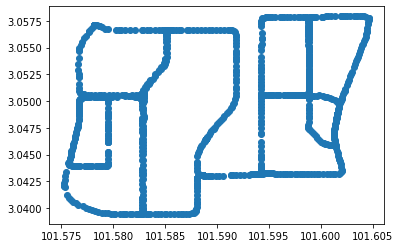

In [9]:
plt.scatter(x=df['Longitude'], y=df['Latitude'])
plt.show()

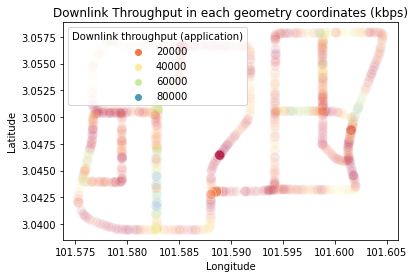

In [10]:
ax = sn.scatterplot(x=df['Longitude'], y=df['Latitude'], s=100,alpha=0.1, palette="Spectral", hue=df['Downlink throughput (application)'])
plt.title('Downlink Throughput in each geometry coordinates (kbps)')
# Remove the legend and add a colorbar
plt.show()

array([[<AxesSubplot:title={'center':'RSRQ'}>]], dtype=object)

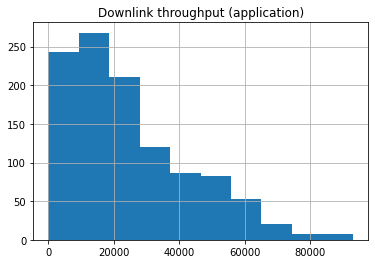

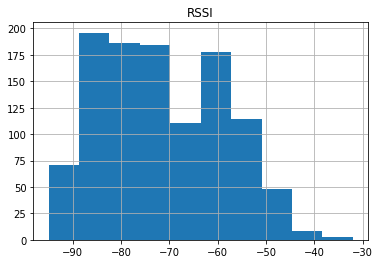

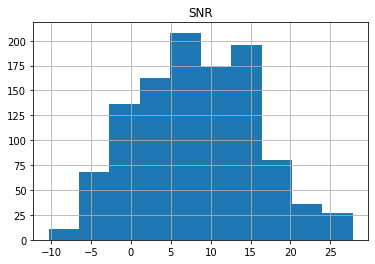

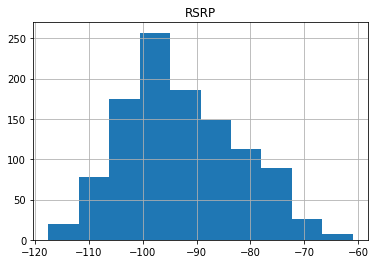

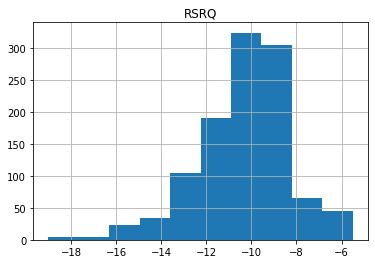

In [11]:
df.hist(column='Downlink throughput (application)')
df.hist(column='RSSI')
df.hist(column='SNR')
df.hist(column='RSRP')
df.hist(column='RSRQ')

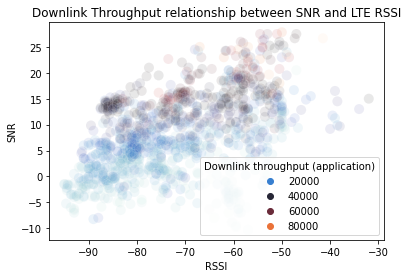

In [12]:
ax = sn.scatterplot(x=df['RSSI'], y=df['SNR'], s=100,alpha=0.1, palette="icefire", hue=df['Downlink throughput (application)'])
plt.title('Downlink Throughput relationship between SNR and LTE RSSI')
# Remove the legend and add a colorbar
plt.show()

**SPLITING THE DATA INTO TRAIN AND TEST**

In [13]:
# Labels are the values we want to predict
labels = np.array(df['Downlink throughput (application)'])
# Remove the labels from the features
# axis 1 refers to the columns
features= df.drop('Downlink throughput (application)', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [14]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [15]:
print('Training Features Shape:', train_features.shape) 
print('Training Labels Shape:', train_labels.shape) # Labels are the values we want to predict
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (824, 6)
Training Labels Shape: (824,)
Testing Features Shape: (275, 6)
Testing Labels Shape: (275,)


**1. RANDOM FOREST**

In [16]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 2000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [17]:
# Use the forest's predict method on the test data
predictionrf = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictionrf - test_labels)

In [18]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
#accuracy not a valid metric because this is regression

Accuracy: 39.08 %.


In [19]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: SNR                  Importance: 0.63
Variable: Longitude            Importance: 0.12
Variable: Latitude             Importance: 0.07
Variable: RSRP                 Importance: 0.06
Variable: RSRQ                 Importance: 0.06
Variable: RSSI                 Importance: 0.05


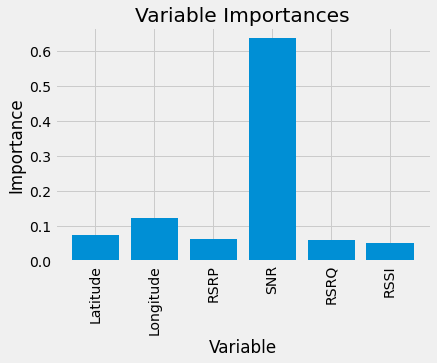

In [20]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [21]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels, predictionrf),'kbps')
print('Mean Squared Error:', metrics.mean_squared_error(test_labels, predictionrf), 'kbps')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, predictionrf)),'kbps')
from sklearn.metrics import r2_score
r2 = r2_score(test_labels, predictionrf)
print('R2 score for random forest model is', r2)

Mean Absolute Error: 6754.162335034811 kbps
Mean Squared Error: 83137811.45443201 kbps
Root Mean Squared Error: 9117.993828383083 kbps
R2 score for random forest model is 0.791904519979363


In [22]:
df=pd.DataFrame({'Actual':test_labels, 'Predicted':predictionrf})
df

,Actual,Predicted
0,14630.600000,11078.004965
1,13044.550000,6722.319227
2,7156.266667,10294.510493
3,7166.000000,16249.360091
4,33403.250000,37632.956274
...,...,...
270,67704.350000,61382.921344
271,51865.950000,58474.601851
272,23102.133330,13389.042403
273,14374.800000,10482.399540


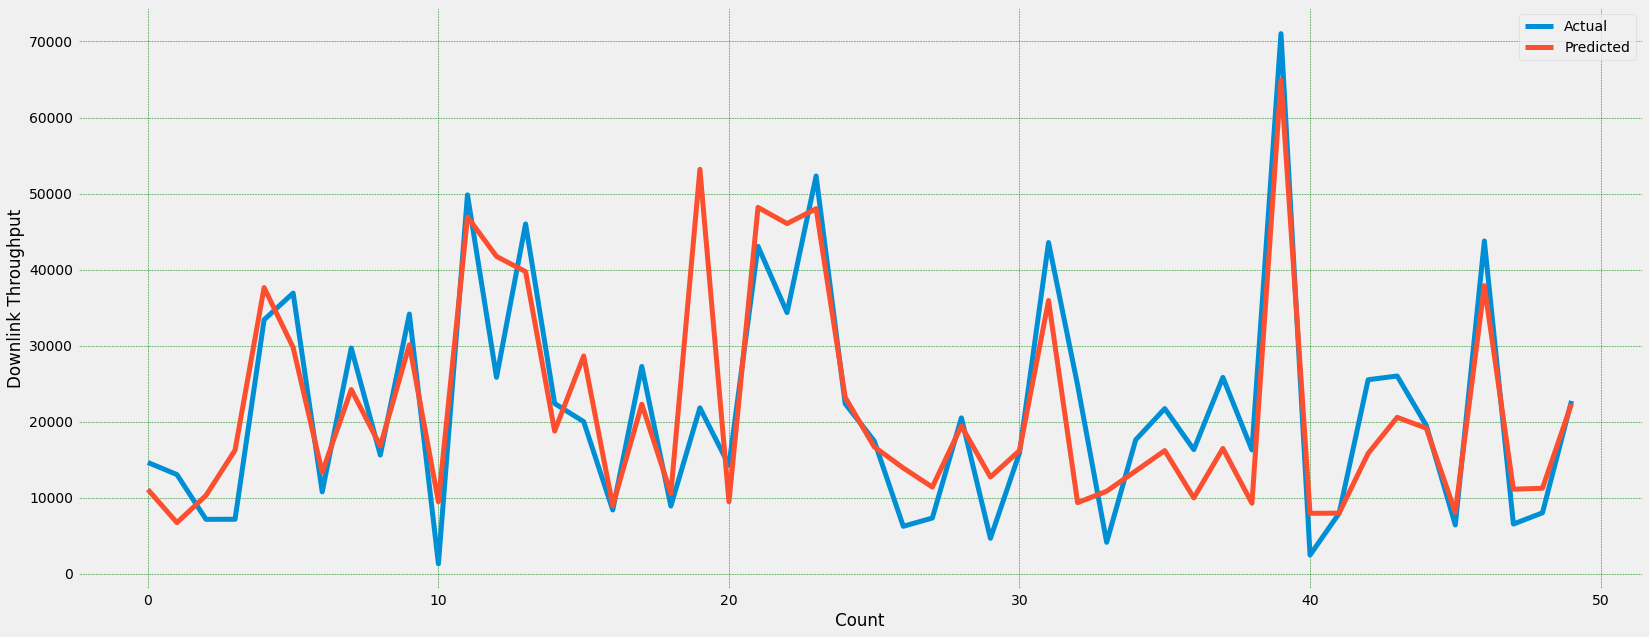

In [23]:
dfrf = df.head(50)
dfrf.plot(kind='line',figsize=(25,10),linewidth='5')
plt.xlabel("Count")
plt.ylabel("Downlink Throughput")
plt.grid(which='major', linestyle='--', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle='--', linewidth='0.5', color='black')
plt.show()

In [24]:
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [25]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

**2. GAUSSIAN PROCESS REGRESSION**

In [26]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
if __name__ == "__main__":
    
    print(train_features)
    print()
    kernel = DotProduct() + WhiteKernel(noise_level=0.5)
    gpr = GaussianProcessRegressor(kernel=kernel, random_state=42).fit(train_features, train_labels)

    print(gpr.score(train_features, train_labels))
    predictiongpr = gpr.predict(test_features)
    mean_absolute_error(test_labels, predictiongpr)

    print('Mean Absolute Error:', mean_absolute_error(test_labels, predictiongpr),'KBPS')
    print('Mean Squared Error:', mean_squared_error(test_labels, predictiongpr), 'KBPS')
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(test_labels, predictiongpr)),'KBPS')
    print('R2 score for Gaussian Process Regression model is', r2_score(test_labels, predictiongpr))
# print(data)

[[   3.04745389  101.6013291   -82.5           0.5         -11.
   -53.5       ]
 [   3.04823267  101.5903616   -97.66666667    3.33333333  -12.
   -79.66666667]
 [   3.048769    101.601555    -74.           10.75         -6.5
   -50.        ]
 ...
 [   3.03944956  101.5815922  -103.3333333     4.          -10.33333333
   -86.        ]
 [   3.04277     101.588074    -95.            4.5         -10.66666667
   -81.33333333]
 [   3.04643311  101.582764    -72.           17.75         -8.
   -58.        ]]

0.3265915871430267
Mean Absolute Error: 12606.985170349615 KBPS
Mean Squared Error: 260949579.66434515 KBPS
Root Mean Squared Error: 16153.933875819386 KBPS
R2 score for Gaussian Process Regression model is 0.3468383748446563


In [27]:
# Calculate the absolute errors
errors = abs(predictiongpr - test_labels)
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
#accuracy not a valid metric because this is regression

Accuracy: -24.29 %.


In [28]:
df2=pd.DataFrame({'Actual':test_labels, 'Predicted':predictiongpr})
df2

,Actual,Predicted
0,14630.600000,21358.386558
1,13044.550000,13220.393844
2,7156.266667,20121.820408
3,7166.000000,16823.845582
4,33403.250000,29290.851343
...,...,...
270,67704.350000,31026.165756
271,51865.950000,33748.298597
272,23102.133330,19752.274223
273,14374.800000,16924.258737


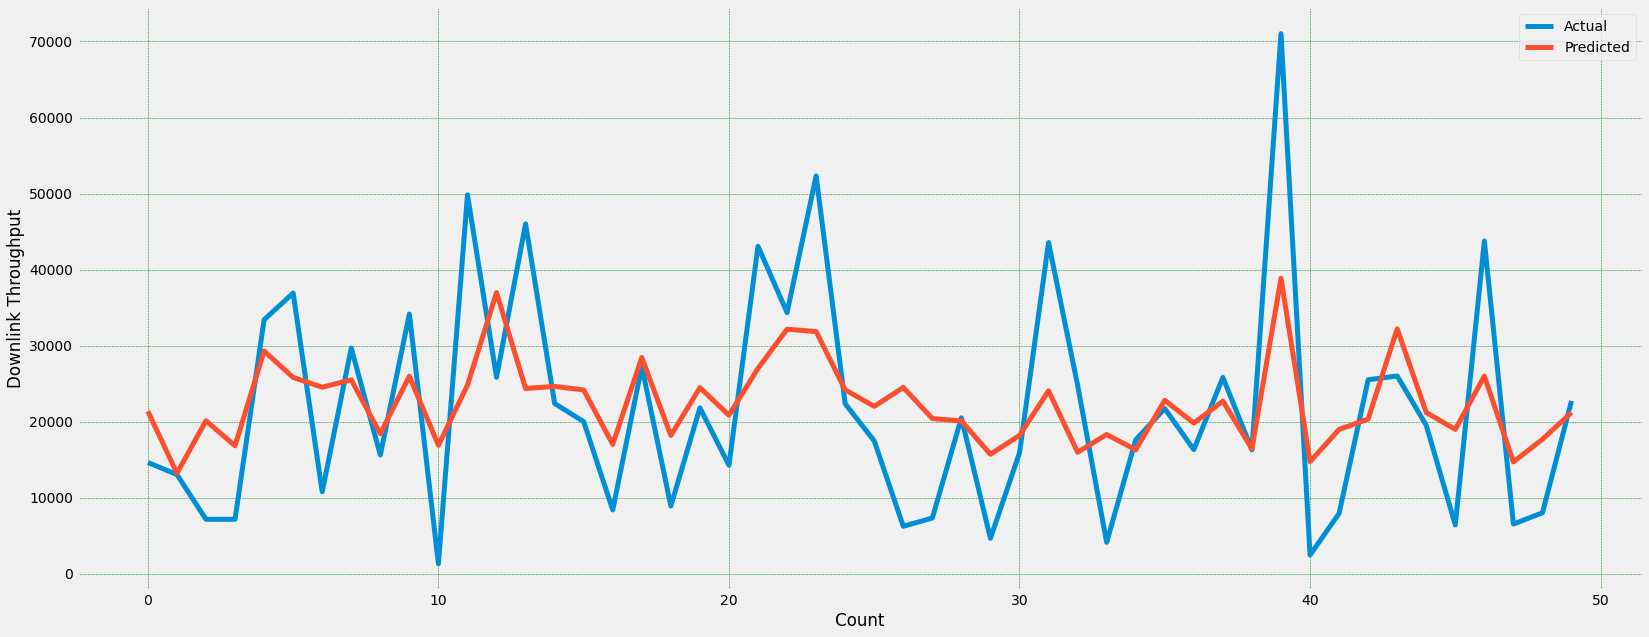

In [29]:
dfgpr = df2.head(50)
dfgpr.plot(kind='line',figsize=(25,10),linewidth='5')
plt.xlabel("Count")
plt.ylabel("Downlink Throughput")
plt.grid(which='major', linestyle='--', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle='--', linewidth='0.5', color='black')
plt.show()

**3. K-NEAREST NEIGHBORS MODEL**

In [30]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(train_features, train_labels)  #fit the model
    predictionktry=model.predict(test_features) #make prediction on test set
    error = sqrt(mean_squared_error(test_labels,predictionktry)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 14974.481819045894
RMSE value for k=  2 is: 13684.399520022376
RMSE value for k=  3 is: 12817.018087501963
RMSE value for k=  4 is: 12547.48117170921
RMSE value for k=  5 is: 12094.271274698498
RMSE value for k=  6 is: 11891.481704043947
RMSE value for k=  7 is: 11699.894620883384
RMSE value for k=  8 is: 11688.327044075693
RMSE value for k=  9 is: 11675.51185605966
RMSE value for k=  10 is: 11584.738191210667
RMSE value for k=  11 is: 11632.195729963543
RMSE value for k=  12 is: 11569.405751135013
RMSE value for k=  13 is: 11541.923335541273
RMSE value for k=  14 is: 11550.481391898074
RMSE value for k=  15 is: 11612.4835087516
RMSE value for k=  16 is: 11672.578082671713
RMSE value for k=  17 is: 11629.941096325732
RMSE value for k=  18 is: 11648.767507198923
RMSE value for k=  19 is: 11700.210575865081
RMSE value for k=  20 is: 11731.333147041394


<AxesSubplot:>

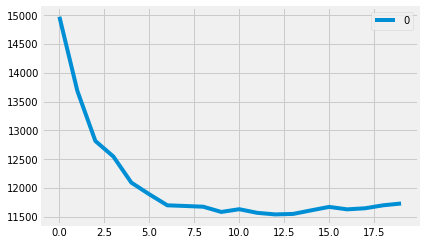

In [32]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [33]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(train_features,train_labels)
model.best_params_

{'n_neighbors': 8}

In [34]:
rmse_val = [] #to store rmse values for different k
for K in range(1):
    K = 13 #take 13 because RMSE value for k=13 is the lowest. Ignore the grid search
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(train_features, train_labels)  #fit the model
    predictionknn=model.predict(test_features) #make prediction on test set
    error = sqrt(mean_squared_error(test_labels,predictionknn)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k = ' , K , 'is:', error)

RMSE value for k =  13 is: 11541.923335541273


In [35]:
    print('Mean Absolute Error:', mean_absolute_error(test_labels, predictionknn),'KBPS')
    print('Mean Squared Error:', mean_squared_error(test_labels, predictionknn), 'KBPS')
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(test_labels, predictionknn)),'KBPS')
    print('R2 score for Gaussian Process Regression model is', r2_score(test_labels, predictionknn))

Mean Absolute Error: 8114.7753378074685 KBPS
Mean Squared Error: 133215994.28351216 KBPS
Root Mean Squared Error: 11541.923335541273 KBPS
R2 score for Gaussian Process Regression model is 0.6665579019716175


In [36]:
# Calculate the absolute errors
errors = abs(predictionknn - test_labels)
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
#accuracy not a valid metric because this is regression

Accuracy: 25.82 %.


In [37]:
df3=pd.DataFrame({'Actual':test_labels, 'Predicted':predictionknn})
df3

,Actual,Predicted
0,14630.600000,14670.169231
1,13044.550000,7711.029487
2,7156.266667,11661.107692
3,7166.000000,14491.397436
4,33403.250000,40374.439745
...,...,...
270,67704.350000,56538.676411
271,51865.950000,56387.617949
272,23102.133330,13463.479487
273,14374.800000,11531.607692


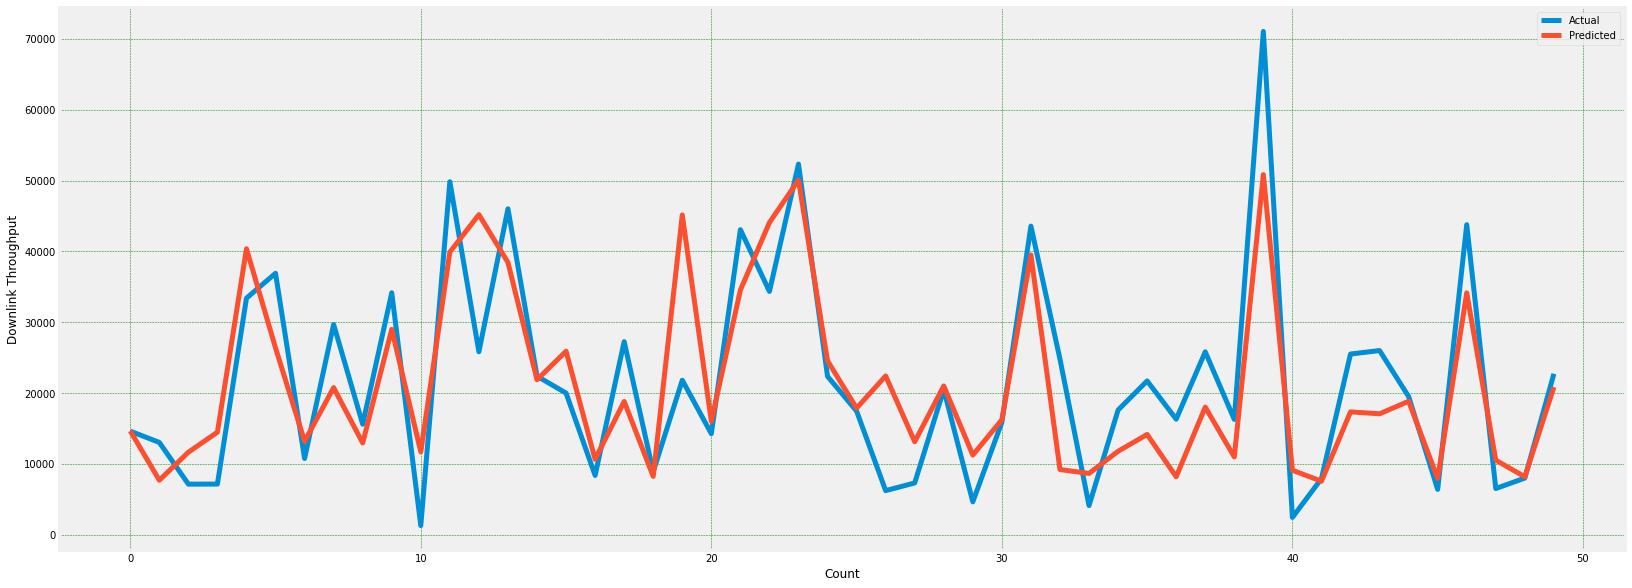

In [38]:
dfknn = df3.head(50)
dfknn.plot(kind='line',figsize=(25,10),linewidth='5')
plt.xlabel("Count")
plt.ylabel("Downlink Throughput")
plt.grid(which='major', linestyle='--', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle='--', linewidth='0.5', color='black')
plt.show()